# Введение в анализ данных
## НИУ ВШЭ, 2019-2020 учебный год

### Домашнее задание №3

Задание выполнил(а): Петросян Арина

### Общая информация

__Дата выдачи:__ 08.04.2020

__Дедлайн:__ 23:59 22.04.2020


### Оценивание и штрафы

Оценка за ДЗ вычисляется по следующей формуле:

$$
\min(\text{points}, 21)  \times 10 / 21,
$$

где points — количество баллов за домашнее задание, которое вы набрали. Максимальное число баллов, которое можно получить за решение данного домашнего задания — 24, все баллы сверх 21 идут в бонус (таким образом, за данное домашнее задание можно получить 3 бонусных балла). Накопленные бонусные баллы можно будет потом распределять по другим домашним заданиям и проверочным (+1 бонусный балл = +1 к оценке за домашнее задание/проверочную).

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

Инвайт для группы ИАД-4: zG1cIyT

Перед отправкой перезагрузите ноутбук и проверьте, что все ячейки могут быть последовательно выполнены. Ноутбук должен запускаться с использованием python 3.6+

### Подготовка данных

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm

In [2]:
# чтобы видеть проход по итерациям, можно использовать библиотеку tqdm
# она работает примерно так:
from tqdm import tqdm
import time

for i in tqdm(range(100)):
    time.sleep(0.01)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 80.68it/s]


### Данные

Мы имеем дело с данными с торговой платформы Avito.
Для каждого товара представлены следующие параметры:
 - `'title'`
 - `'description'`
 - `'Category_name'`
 - `'Category'`

Имеется информация об объектах 50 классов.
Задача: по новым объектам (`'title'`, `'description'`) предсказать `'Category'`.
(Очевидно, что параметр `'Category_name'` для предсказания классов использовать нельзя)

In [3]:
data = pd.read_csv("avito_data.csv", index_col='id')

data.head()

,title,description,Category_name,Category
id,,,,
382220,Прихожая,В хорошем состоянии. Торг,Мебель и интерьер,20
397529,Кордиант 215/55/16 Летние,Кордиант 215/55/16 Летние/\n /\nАртикул: 1737l...,Запчасти и аксессуары,10
584569,Стол,"Стол, 2 рабочих места . Стол серого цвета, в д...",Мебель и интерьер,20
2513100,Комбинезон,Размер-42/44,"Одежда, обувь, аксессуары",27
1091886,Ветровка,На 2 года,Детская одежда и обувь,29


In [4]:
data.shape

(30000, 4)

In [5]:
X = data[['title', 'description']].to_numpy()
y = data['Category'].to_numpy()

del data

Сразу разделим выборку на train и test.
Никакие данные из test для обучения использовать нельзя!

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
y_train[:5]

array([ 27,  20,  84, 106,  27], dtype=int64)

### Токенизация (0.5 балла)


Токенизация -- разбиение текста на мелкие части, которые можно обработать машинными методами.
Можно использовать разные алгоритмы токенизации. В данном задании мы будем использовать `WordPunctTokenizer`.

In [8]:
from nltk.tokenize import WordPunctTokenizer

tokenizer = WordPunctTokenizer()

text = 'Здраствуйте. Я, Кирилл. Хотел бы чтобы вы сделали игру, 3Д-экшон суть такова...'

print("before:", text,)
print("after:", tokenizer.tokenize(text.lower()))

before: Здраствуйте. Я, Кирилл. Хотел бы чтобы вы сделали игру, 3Д-экшон суть такова...
after: ['здраствуйте', '.', 'я', ',', 'кирилл', '.', 'хотел', 'бы', 'чтобы', 'вы', 'сделали', 'игру', ',', '3д', '-', 'экшон', 'суть', 'такова', '...']


__Задание:__ реализуйте функцию ниже.

In [9]:
def preprocess(text: str, tokenizer) -> str:
    """
    Данная функция принимает на вход текст, 
    а возвращает тот же текст, но с пробелами между каждым токеном
    """
    text = text.lower()
    after_text = ' '.join(tokenizer.tokenize(text))
    return after_text

In [10]:
assert preprocess(text, tokenizer) == 'здраствуйте . я , кирилл . хотел бы чтобы вы сделали игру , 3д - экшон суть такова ...'

__Задание:__ токенизируйте `'title'` и `'description'` в `train` и `test`.

In [11]:
for i in range(len(X_train)):
    for j in range(len(X_train[i])):
        X_train[i][j] = preprocess(X_train[i][j], tokenizer) 
        # your code here

In [12]:
for i in range(len(X_test)):
    for j in range((len(X_test[i]))):
        X_test[i][j] = preprocess(X_test[i][j], tokenizer) 

In [13]:
assert X_train[5][0] == '1 - к квартира , 33 м² , 4 / 5 эт .'
assert X_train[10][1] == 'продам иж планета 3 , 76 год , ( стоит на старом учёте , документы утеряны ) на ходу , хорошее состояние , все интересующие вопросы по телефону ( с родной коляской на 3 тысячи дороже ) . торга не будет .'
assert X_test[2][0] == 'фара правая toyota rav 4 галоген 2015 - 19'
assert X_test[2][1] == 'фара правая для toyota rav4 2015 / оригинальный номер : 8113042650 / тойота рав4 тоета рав 4 / производитель : toyota / состояние : отличное без дефектов ! / комментарий : после 2015 не ксенон галоген + диод / пожалуйста , уточняйте соответствие вашего заказа изображенному на фото . / звоните уточняйте по наличию предоставляется время на проверку детали / отправляем в регионы рф транспортными компаниями / . / всегда включен вайбер вацап по вопросам !/ дополнительное фото по запросу'

### BOW (3 балла)

Один из традиционных подходов -- построение bag of words.

Метод состоит в следующем:

 - Составить словарь самых часто встречающихся слов в `train data`
 - Для каждого примера из `train` посчитать, сколько раз каждое слово из словаря в нём встречается


 В `sklearn` есть `CountVectorizer`, но в этом задании его использовать нельзя.

__Задание:__ создайте словарь, где каждому токену соответствует количество раз, которое оно встретилось в `X_train`.

In [14]:
def tokens_counter(items):
    cnt = {}
    for lst in items:
        for text in lst:
            for w in text.split():
                if w in cnt:
                    cnt[w] += 1
                else:
                    cnt[w] = 1
    return cnt

In [15]:
tokens_cnt = tokens_counter(X_train)

In [16]:
assert tokens_cnt['сапоги'] == 454

__Задание:__ выведите 10 самых частотных и 10 самых редких токенов.

In [17]:
tokens_cnt_list = list(tokens_cnt.items())
tokens_cnt_list.sort(key=lambda x: x[1], reverse=True)

In [18]:
most_frequent = []
for i in tokens_cnt_list[:10]:
    most_frequent.append(i[0])
    
least_frequent = []
for i in tokens_cnt_list[-10:]:
    least_frequent.append(i[0])

In [19]:
print('10 самых частотных токенов:', most_frequent, sep='\n') # your code here
print('10 самых редких токенов:', least_frequent, sep='\n')

10 самых частотных токенов:
['/', ',', '.', '-', 'в', 'и', 'на', './', ':', 'с']
10 самых редких токенов:
['шуршат', 'гремят', 'петровского', 'столиц', 'объективную', 'понравившейся', 'беспрецедентно', 'дооснастить', 'хлебозаводская', 'фрионом']


__Задание:__ оставьте в словаре только топ-10000 самых частотных токенов, также создайте отдельный список из этих слов.

In [20]:
tokens_cnt = dict(tokens_cnt_list[:10000]) # your code here
tokens_list = list(tokens_cnt.keys()) # your code here

In [21]:
tokens_cnt['для']

9627

__Задание:__ реализуйте функцию, которая переводит текст в вектор из чисел. То есть каждому токену из списка токенов сопоставляется количество раз, которое он встретился в тексте.

In [22]:
def text_to_bow(text: str, tokens_list: list) -> np.array:
    """
    Возвращает вектор, где для каждого слова из словаря
    указано количество его употреблений в предложении
    input: строка, список токенов
    output: вектор той же размерности, что и список токенов
    """
    
    a = np.array(tokens_list)
    tokens_dict = dict(zip(a, np.zeros(a.shape)))
    for word in text.split():
        if word in tokens_list:
            tokens_dict[word] += 1
    return np.array(list(tokens_dict.values()))

In [23]:
example_text = text_to_bow("сдаётся уютный , тёплый гараж для стартапов в ml", tokens_list)

assert np.allclose(example_text.mean(), 0.0008)

In [24]:
np.nonzero(example_text)[0] # как и у многих, assert ломается из-за разной индексации

array([   1,    4,   12,  565,  866, 1601, 2539, 4063], dtype=int64)

__Задание:__ а теперь реализуйте функцию, которая преобразует наш датасет и каждому тексту из `'description'` сопоставляет вектор.

In [25]:
def descr_to_bow(items: np.array, tokens_list: list) -> np.array:
    """ Для каждого описания товара возвращает вектор его bow """
    
    all_texts_vec = np.zeros((len(items), len(tokens_list)))
    for i in tqdm(range(len(items))):
        all_texts_vec[i] = text_to_bow(items[i][1], tokens_list)
    return all_texts_vec

In [26]:
X_train_bow = descr_to_bow(X_train, tokens_list)

100%|████████████████████████████████████████████████████████████████████████████| 21000/21000 [10:33<00:00, 33.30it/s]


In [27]:
X_test_bow = descr_to_bow(X_test, tokens_list)

100%|██████████████████████████████████████████████████████████████████████████████| 9000/9000 [04:27<00:00, 33.63it/s]


In [28]:
X_test_bow.shape

(9000, 10000)

In [29]:
np.linalg.norm(X_train_bow[-3])

57.33236433289665

In [30]:
assert X_train_bow.shape == (21000, 10000), X_test_bow.shape == (9000, 10000)
assert 0.005 < X_train_bow.mean() < 0.006
assert 0.005 < X_test_bow.mean() < 0.006

### Логистическая регрессия и SVC (0.5 балла)


Теперь описание каждого товара представлено, как точка в многомерном пространстве.
Очень важно запомнить эту идею: дальше мы будем рассматривать разные способы перехода от текста к точке в пространстве.

Для BOW каждое измерение в пространстве -- какое-то слово.
Мы предполагаем, что текст описывается набором каких-то популярных слов, которые в нём встречаются, а близкие по смыслу тексты будут использовать одинаковые слова.

Обучите логистическую регрессию и SVM с линейным ядром (`sklearn.svm.LinearSVC` или `sklearn.svm.SVC(kernel='linear')`) с базовыми параметрами. При необходимости можете увеличить максимальное число итераций. В качестве `random_state` возьмите 13.

_Подсказка: для того, чтобы было проще обучать, можно использовать [разреженные матрицы](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D0%B7%D1%80%D0%B5%D0%B6%D0%B5%D0%BD%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0) - многие модели из `sklearn` умеют с ними работать. Соответствующий модуль из `scipy`: [scipy.sparse](https://docs.scipy.org/doc/scipy/reference/sparse.html). Нетрудно заметить, что в полученных BOW-матрицах очень много нулей. Если хранить в памяти только ненулевые элементы, можно сильно оптимизировать вычисления. Можете в этом убедиться:_

In [31]:
print('Train array in memory (raw): {:.3f} Mb'.format(X_train_bow.nbytes * 1e-6))

from scipy.sparse import csr_matrix
X_train_bow_csr = csr_matrix(X_train_bow)
print('Train array in memory (compressed): {:.3f} Mb'.format(
    (X_train_bow_csr.data.nbytes + X_train_bow_csr.indptr.nbytes + X_train_bow_csr.indices.nbytes) * 1e-6)
)

Train array in memory (raw): 1680.000 Mb
Train array in memory (compressed): 8.606 Mb


In [32]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [33]:
# Logistic Regression
lr = LogisticRegression(random_state=13)
lr = lr.fit(X_train_bow_csr, y_train) # train

C:\Users\arina\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\arina\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [34]:
y_pred_lr = lr.predict(X_test_bow) # predict

assert accuracy_score(y_test, y_pred_lr) > 0.695
accuracy_score(y_test, y_pred_lr)

0.7046666666666667

In [35]:
# SVM
SVM = LinearSVC(random_state=13)
SVM = SVM.fit(X_train_bow_csr, y_train) # train

C:\Users\arina\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [36]:
y_pred_svm = SVM.predict(X_test_bow)

assert accuracy_score(y_test, y_pred_svm) > 0.68
accuracy_score(y_test, y_pred_svm)

0.6842222222222222

In [37]:
X_train_bow_csr.shape, y_train.shape

((21000, 10000), (21000,))

### Модификация признаков (2 балла)

Прибавьте к соответствующим BOW-векторам BOW-вектора для `'title'` товара с некоторым весом. Изменится ли качество? Как вы можете это объяснить?

In [38]:
def title_to_bow(items: np.array, tokens_list: list) -> np.array:
    """ Для каждого названия товара возвращает вектор его bow """
    
    all_texts_vec = np.zeros((len(items), len(tokens_list)))
    for i in tqdm(range(len(items))):
        all_texts_vec[i] = text_to_bow(items[i][0], tokens_list)
    return all_texts_vec
 # your code here for

In [39]:
X_train_bow_t = title_to_bow(X_train, tokens_list)

100%|████████████████████████████████████████████████████████████████████████████| 21000/21000 [09:05<00:00, 38.53it/s]


In [40]:
X_train_bow_td = X_train_bow_t + X_train_bow
X_train_bow_td.shape

(21000, 10000)

In [41]:
X_test_bow_t = title_to_bow(X_test, tokens_list)

100%|██████████████████████████████████████████████████████████████████████████████| 9000/9000 [03:55<00:00, 34.03it/s]


In [42]:
X_test_bow_td = csr_matrix(X_test_bow_t + X_test_bow)
X_test_bow_td.shape

(9000, 10000)

In [43]:
lr = lr.fit(X_train_bow_td, y_train) # лог регрессия на ненормализованных данных
y_pred_td_lr = lr.predict(X_test_bow_td)

C:\Users\arina\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\arina\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [44]:
accuracy_score(y_test, y_pred_td_lr) # для лог регрессии

0.7837777777777778

In [45]:
SVM = SVM.fit(X_train_bow_td, y_train)  # SVM на ненормализованных данных
y_pred_td_svm = SVM.predict(X_test_bow_td)

C:\Users\arina\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [46]:
accuracy_score(y_test, y_pred_td_svm) # для SVM

0.7535555555555555

- Как видим качество возросло, так как добавление title помогает получить больше информации о товаре

Нормализуйте данные с помощью `MinMaxScaler` или `MinAbsScaler` перед обучением. Что станет с качеством и почему?

In [47]:
from sklearn.preprocessing import MaxAbsScaler # your code here for

In [48]:
sc = MaxAbsScaler() # нормализуем признаки
X_train_bow_norm = sc.fit_transform(X_train_bow_td)
X_test_bow_norm = sc.transform(X_test_bow_td)

In [49]:
lr = lr.fit(X_train_bow_norm, y_train) # лог регрессия на нормализованных данных
y_pred_n_lr = lr.predict(X_test_bow_norm)

C:\Users\arina\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\arina\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [50]:
accuracy_score(y_test, y_pred_n_lr) 

0.7315555555555555

In [51]:
SVM = SVM.fit(X_train_bow_norm, y_train)  # SVM на нормализованных данных
y_pred_n_svm = SVM.predict(X_test_bow_norm)

In [52]:
accuracy_score(y_test, y_pred_n_svm) 

0.7593333333333333

- заметим, что относительно первоначального алгоритма качество выросло, однако оно хуже, чем до нормализации

Почему в данном случае использовать `StandardScaler` - не очень хорошая идея?
    
Ответ: потому что приведение к нормальному стндартному распрделению лучше всего использовать тогда, когда признаки изначально имеют распределени, близкое к нормальному. Также StandardScaler при нормализации делит на стандартное отклонение, что в данном случае не лучшкее решение, тк в векторах очень много нулей и  дисперсия нередко будет стремиься к нулю.

### Иная предобработка (1 балл)

**На выбор**:

- **либо** обучите модели, используя для предобработки токенизатор и лемматизатор `pymystem3.Mystem`.
- **либо** добавьте к предобработке стэмминг.

Сравните полученное сейчас качество с полученным ранее и сделайте вывод.

In [53]:
from nltk.stem.snowball import SnowballStemmer # your code here

In [54]:
stemmer = SnowballStemmer('russian')

In [55]:
def stem_text(text):
    stemmed = [stemmer.stem(w) for w in text.split()]
    return ' '.join(stemmed)

In [56]:
X_train_stemmed = np.zeros_like(X_train)
for i in range(len(X_train)):
    for j in range(len(X_train[i])):
        X_train_stemmed[i][j] = stem_text(X_train[i][j]) 

In [60]:
X_test_stemmed = np.zeros_like(X_test)
for i in range(len(X_test)):
    for j in range(len(X_test[i])):
        X_test_stemmed[i][j] = stem_text(X_test[i][j]) 

In [61]:
stemmed_tokens = tokens_counter(X_train_stemmed)

In [62]:
stemmed_list = list(stemmed_tokens.items())
stemmed_list.sort(key=lambda x: x[1], reverse=True)

In [63]:
stemmed_tokens = dict(stemmed_list[:10000]) 
stemmed_list = list(stemmed_tokens.keys()) # нашли 10000 самых частых токенов  после стэмминга

In [64]:
X_train_stemmed_bow_descr = descr_to_bow(X_train_stemmed, stemmed_list)
X_test_stemmed_bow_descr = descr_to_bow(X_test_stemmed, stemmed_list)
X_train_stemmed_bow_title = title_to_bow(X_train_stemmed, stemmed_list)
X_test_stemmed_bow_title = title_to_bow(X_test_stemmed, stemmed_list)

100%|██████████████████████████████████████████████████████████████████████████████| 9000/9000 [06:38<00:00, 39.10it/s]


In [300]:
X_train_stemmed_bow = X_train_stemmed_bow_descr + X_train_stemmed_bow_title
X_test_stemmed_bow = X_test_stemmed_bow_descr + X_test_stemmed_bow_title

In [301]:
lr = lr.fit(X_train_stemmed_bow, y_train) # лог регрессия
y_pred_st_lr = lr.predict(X_test_stemmed_bow)

C:\Users\arina\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\arina\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [302]:
accuracy_score(y_test, y_pred_st_lr)

0.8034444444444444

In [68]:
SVM = SVM.fit(X_train_stemmed_bow, y_train) # SVM
y_pred_st_svm = SVM.predict(X_test_stemmed_bow)

C:\Users\arina\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [69]:
accuracy_score(y_test, y_pred_st_svm)

0.7736666666666666

ВЫВОД: Стемминг достаточно сильно повышает качество, несмотря на то что он даже не приводит к начальной форме, а только отбрасывает окончания и суфиксы (префиксы)!!!

### TF-IDF (5 баллов)

Не все слова полезны одинаково, давайте попробуем [взвесить](http://tfidf.com/) их, чтобы отобрать более полезные.


> TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).
> 
> IDF(t) = log_e(Total number of documents / Number of documents with term t in it).


В `sklearn` есть `TfidfVectorizer`, но в этом задании его использовать нельзя. Для простоты посчитайте общий tf-idf для `'title'` и `'description'` (то есть каждому объекту надо сопоставить вектор, где как документ будет рассматриваться конкатенация `'title'` и `'description'`).

__Задание:__ составьте словарь, где каждому слову из изначального списка будет соответствовать количество документов из `train`-части, где это слово встретилось.

In [70]:
X_train_doc = []
for i in range(21000):
    X_train_doc.append(' '.join(X_train[i]))
X_train_doc = np.array(X_train_doc)

In [71]:
X_test_doc = []
for i in range(9000):
    X_test_doc.append(' '.join(X_test[i]))
X_test_doc = np.array(X_test_doc)

In [72]:
word_document_cnt = dict(zip(tokens_list, np.zeros(10000)))

In [73]:
for document in tqdm(X_train_doc):
    for word in set(document.split()):
        if word in word_document_cnt:
            word_document_cnt[word] += 1

100%|█████████████████████████████████████████████████████████████████████████| 21000/21000 [00:02<00:00, 10150.82it/s]


In [74]:
assert word_document_cnt['размер'] == 2839

__Задание:__ реализуйте функцию, где тексту в соответствие ставится tf-idf вектор. Для вычисления IDF также необходимо число документов в `train`-части (параметр `n_documents_total`).

In [75]:
def text_to_tfidf(text: str, word_document_cnt: dict, tokens_list: list, n_documents_total: int) -> np.array:
    """
    Возвращает вектор, где для каждого слова из словаря
    указан tf-idf
    """
    text_words = text.split()
    l = len(text_words)
    tf_idf = dict(zip(word_document_cnt, np.zeros(10000)))
    for word in set(text_words):
        if word in word_document_cnt:
            tf = text_words.count(word) / l
            idf = np.log(n_documents_total / word_document_cnt[word])
            tf_idf[word] = tf*idf
    return np.array(list(tf_idf.values()))
    # your code here

In [76]:
example_text = text_to_tfidf(
    'сдаётся уютный , тёплый гараж для стартапов в ml',
    word_document_cnt,
    tokens_list,
    n_documents_total=len(X_train)
)
assert np.allclose(np.linalg.norm(example_text), 1.4435668)
assert 0.0003 < example_text.mean() < 0.0004

__Задание:__ а теперь реализуйте функцию, которая преобразует наш датасет и для каждого объекта сопоставляет вектор tf-idf. В качестве текстов используйте конкатенацию `'title'` и `'description'`.

In [77]:
def items_to_tfidf(items: np.array, word_document_cnt: dict, tokens_list: list, n_documents_total: int) -> np.array:
    """
    Для каждого товара возвращает его tf-idf вектор
    """
    all_texts_vec = np.zeros((len(items), 10000))
    for i in tqdm(range(len(items))):
        all_texts_vec[i] = text_to_tfidf(items[i], word_document_cnt, tokens_list, n_documents_total)
    return all_texts_vec

In [78]:
X_train_tfidf = items_to_tfidf(X_train_doc, word_document_cnt, tokens_list, len(X_train_doc))

100%|███████████████████████████████████████████████████████████████████████████| 21000/21000 [02:27<00:00, 142.73it/s]


In [79]:
X_test_tfidf = items_to_tfidf(X_test_doc, word_document_cnt, tokens_list, len(X_train_doc))

100%|█████████████████████████████████████████████████████████████████████████████| 9000/9000 [01:02<00:00, 145.11it/s]


In [80]:
X_train_tfidf.shape

(21000, 10000)

In [81]:
assert X_train_tfidf.shape == (21000, 10000), X_test_tfidf.shape == (9000, 10000)
assert 0.0002 < X_train_tfidf.mean() < 0.0004
assert 0.0002 < X_test_tfidf.mean() < 0.0004

In [82]:
assert np.allclose(np.linalg.norm(X_train_tfidf[-3]), 0.32672414) # старый assert
assert np.allclose(np.linalg.norm(X_test_tfidf[0]), 0.37996078)

AssertionError: 

In [83]:
np.linalg.norm(X_train_tfidf[-3]), np.linalg.norm(X_test_tfidf[0])

(0.3278140104037421, 0.3799607690718185)

__Задание:__ обучите логистическую регрессию и SVC, оцените качество (accuracy_score). Сделайте вывод.

In [84]:
# отнормируем данные
X_train_tfidf_n = sc.fit_transform(X_train_tfidf)
X_test_tfidf_n = sc.transform(X_test_tfidf)

In [85]:
# создадим разреженные матрицы
X_train_tfidf_csr = csr_matrix(X_train_tfidf_n)
X_test_tfidf_csr = csr_matrix(X_test_tfidf_n)

In [86]:
# your code here for LogReg
lr_model = LogisticRegression(random_state=13)
lr_model = lr_model.fit(X_train_tfidf_csr, y_train)

assert accuracy_score(y_test, lr_model.predict(X_test_tfidf_csr)) > 0.675

C:\Users\arina\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\arina\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [87]:
accuracy_score(y_test, lr_model.predict(X_test_tfidf_csr))

0.7167777777777777

In [88]:
# your code here for SVM (SVM без нормировки)
svc_model = LinearSVC(random_state=13)
svc_model = svc_model.fit(X_train_tfidf, y_train)

assert accuracy_score(y_test, svc_model.predict(X_test_tfidf)) > 0.79

In [89]:
accuracy_score(y_test, svc_model.predict(X_test_tfidf))

0.7942222222222223

ВЫВОД (о TF-IDF): Нормализация помогает улучшить качество при использовании Логистической регрессии, но не SVC. Также TF-IDF в принципе работает лучше с SVC, для лог. регрессии метод bow-векторов подошел больше.

### Word Vectors (4 балла)

Давайте попробуем другой подход -- каждому слову сопоставим какое-то векторное представление (эмбеддинг) - но достаточно маленькой размерности. Таким образом мы сильно уменьшим количество параметров в модели.

Почитать про это подробнее можно тут:

- https://habr.com/ru/company/ods/blog/329410/

Вектора мы возьмём уже готовые (обученные на текстах из интернета), так что наша модель будет знать некоторую дополнительную информацию о внешнем мире.

In [90]:
!tar -xzf ru.tar.gz
# распаковка файла - опять же, если не работает, распакуйте вручную

In [91]:
!pip install gensim

In [94]:
import gensim
from gensim.models.wrappers import FastText

embedding_model = FastText.load_fasttext_format('ru.bin')

In [95]:
# как мы видим, каждому слову данная модель сопоставляет вектор размерности 300

print(embedding_model['привет'].shape)
print(embedding_model['привет'])

(300,)
[ 0.02916384  0.02167605  0.05127367 -0.00971958  0.0465235  -0.03945766
  0.02737866  0.00638128 -0.03774629 -0.04257201 -0.00995653  0.02291315
 -0.02301722  0.06697998 -0.03674482 -0.02403202 -0.05404469  0.01372932
  0.00926399 -0.0013149   0.11941359 -0.022448    0.04011497  0.06980549
  0.00407011 -0.09384539  0.03050164 -0.02578281 -0.03525181 -0.06603175
  0.04752798  0.05874675  0.01983666  0.06092105 -0.00957561  0.08307806
 -0.01288903  0.04705157  0.02198839 -0.00649013 -0.0171444   0.03302203
  0.02124882 -0.01902875 -0.05235172  0.03458685 -0.01409259 -0.07477519
  0.01916078  0.02985001  0.0086322   0.03051201  0.02831862  0.04549561
  0.00761138 -0.05459622  0.09056009 -0.08807947 -0.05420396 -0.04793203
 -0.05672329 -0.03025264 -0.03024072 -0.05890108 -0.03137474  0.03292617
  0.05440779 -0.04548327 -0.07266086 -0.09327219  0.07247883  0.0111061
  0.01824225 -0.10570452  0.05110046 -0.04659343 -0.03277056 -0.00803401
 -0.03978698  0.00826598 -0.01074128  0.01843

In [163]:
len(embedding_model['размер'])

300

__Задание:__ реализуйте функцию, выдающую эмбеддинг для предложения - как сумму эмбеддингов токенов.

In [165]:
def sentence_embedding(sentence: str, embedding_model) -> np.array:
    """
    Складывает вектора токенов строки sentence
    """
    embed = np.zeros(len(embedding_model['размер']))
    for word in sentence.split():
        if word in embedding_model:
            embed += embedding_model[word]
    return embed

In [98]:
assert sentence_embedding('сдаётся уютный , тёплый гараж для стартапов в ml', embedding_model).shape == (300,)
assert np.allclose(np.linalg.norm(sentence_embedding('сдаётся уютный , тёплый гараж для стартапов в ml', embedding_model)), 2.6764746)

In [99]:
np.linalg.norm(sentence_embedding('сдаётся уютный , тёплый гараж для стартапов в ml', embedding_model)) 

2.676474469401541

__Задание:__ сделайте все то же, что в предыдущих пунктах -- реализуйте функцию, которая преобразует данные, а затем обучите логистическую регрессию и SVM, оцените качество. Сделайте вывод, что работает лучше - модель, основанная на TF-IDF, или модель, обученная на предобученных эмбеддингах?

In [164]:
def items_embedding(items: np.array, embedding_model):
    all_texts_vec = np.zeros((len(items), len(embedding_model['размер'])))
    for i in tqdm(range(len(items))):
        all_texts_vec[i] = sentence_embedding(items[i], embedding_model)
    return all_texts_vec

In [101]:
X_train_embedding = items_embedding(X_train_doc, embedding_model)
X_test_embedding = items_embedding(X_test_doc, embedding_model)

100%|█████████████████████████████████████████████████████████████████████████████| 9000/9000 [00:22<00:00, 400.29it/s]


In [102]:
lr_model = lr_model.fit(X_train_embedding, y_train)
y_pred_emb_lr = lr_model.predict(X_test_embedding)

accuracy_score(y_test, y_pred_emb_lr) # как же сильно упало качество...

C:\Users\arina\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\arina\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.5782222222222222

In [103]:
svc_model = svc_model.fit(X_train_embedding, y_train)
y_pred_emb_svc = svc_model.predict(X_test_embedding)

accuracy_score(y_test, y_pred_emb_svc) # просто ужас(

C:\Users\arina\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5747777777777778

In [104]:
# попробуем отнормировать
X_train_embedding = sc.fit_transform(X_train_embedding)
X_test_embedding = sc.transform(X_test_embedding)

In [105]:
lr_model = lr_model.fit(X_train_embedding, y_train)
y_pred_emb_lr_n = lr_model.predict(X_test_embedding)

accuracy_score(y_test, y_pred_emb_lr_n) # еще хуже, не стоило так делать

C:\Users\arina\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\arina\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.3641111111111111

In [106]:
svc_model = svc_model.fit(X_train_embedding, y_train)
y_pred_emb_svc_n = svc_model.predict(X_test_embedding)

accuracy_score(y_test, y_pred_emb_svc_n) # мда...

C:\Users\arina\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.45

ВЫВОД: полагаю, эмбеддинг показал такие плохие результаты, потому что токены не лемматизированы и вообще embedding_model включает в себя рандомные слова. Таким образом, в данном случае TF-IDF работате лучше

### Что дальше? (8 баллов)

Для получения максимальной оценки вам нужно решить любые 2 пункта.

1. Реализовать n-gram модели текстовой классификации (__2 балла__)

2. Поработать с другими эмбеддингами для слов (например `word2vec` или `GloVe`) (__2 балла__)

3. Применить другие способы токенизации (например, `pymorphy2`, `spaCy`) и в целом предобработки данных (стоп-слова, стэмминг, лемматизация) (__2 балла__)

4. Добиться качества > 0.82 на тестовых данных (попробуйте другие токенизаторы, предобработку текста, и любые другие идеи, которые вам придут в голову) (__2 балла__)

Снабжайте код пояснениями и графиками.
Обязательно необходимо написать вывод по каждому пункту, который вы реализуете.

### 1. Реализуем n-gram модели!

In [107]:
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer

In [108]:
vec = CountVectorizer(ngram_range=(1, 3)) # обозначим функцию, преобразующую в необходимые векторы наш массив
bow = vec.fit_transform(X_train_doc) # применим ее

# обучим Лог. регрессию
lr_model.fit(bow, y_train)
y_pred_ngram_lr = lr_model.predict(vec.transform(X_test_doc)) # заметила, что с увеличением n точность падает

C:\Users\arina\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\arina\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [109]:
accuracy_score(y_test, y_pred_ngram_lr) # на триграммах точность была 0.47, а тут выросла!

0.7736666666666666

In [110]:
svc_model.fit(bow, y_train)
y_pred_ngram_svc = svc_model.predict(vec.transform(X_test_doc))

In [111]:
accuracy_score(y_test, y_pred_ngram_svc) # тут аналогичная ситуация

0.7875555555555556

#### Построим график дя n-gram

In [390]:
accuracy = []
iii = []
for i in tqdm(range(1, 6)):
    vec = CountVectorizer(ngram_range=(i, i)) # обозначим функцию, преобразующую в необходимые векторы наш массив
    X_train_b = vec.fit_transform(X_train_doc)
    svc_model.fit(X_train_b, y_train)
    y_pred_ngram_i = svc_model.predict(vec.transform(X_test_doc))
    accuracy.append(accuracy_score(y_test, y_pred_ngram_i))
    iii.append(i)

 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [03:59<00:59, 59.03s/it]C:\Users\arina\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [05:59<00:00, 77.28s/it]


In [392]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Accuracy score')

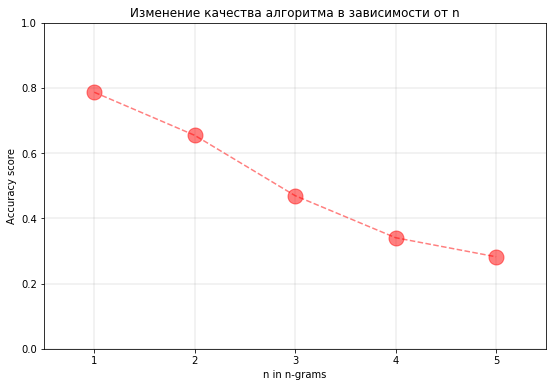

In [432]:
fig = plt.figure(figsize=(9, 6))
plt.plot(iii, accuracy, '--go', c = 'r', ms=15, alpha=0.5)
plt.ylim(0, 1)
plt.xlim(0.5, 5.5)
plt.grid(color='grey', linestyle='-', linewidth=0.2)
plt.title('Изменение качества алгоритма в зависимости от n')
plt.xlabel('n in n-grams')
plt.ylabel('Accuracy score')

ВЫВОД: при использовании n-gram стоит поэспериментировать с гипер-параметрами, возможно, даже стоило grid_search запустить. Но ручным перебором заметила, что с уменьшением n точность возрастала. Самыми оптимальным оказались униграммы, но чтобы разнообразить домашку,  использовала range от униграмм до триграмм (1, 3)

### 2. Поработаем с word2vec

In [112]:
from gensim.sklearn_api import D2VTransformer

In [125]:
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec
path = get_tmpfile("word2vec.model")


In [317]:
# создадим векторы для слов из выборки
model = Word2Vec([i.split() for i in X_train_doc], size=250, min_count=1) 

In [318]:
wv = model.wv # присвоим название для удобства

In [319]:
X_train_wv_embedding = items_embedding(X_train_doc, wv_embedding)
X_test_wv_embedding = items_embedding(X_test_doc, wv_embedding)

100%|████████████████████████████████████████████████████████████████████████████| 9000/9000 [00:02<00:00, 3761.83it/s]


In [320]:
lr_model = lr_model.fit(X_train_wv_embedding, y_train)
y_pred_wv_lr = lr_model.predict(X_test_wv_embedding)

accuracy_score(y_test, y_pred_wv_lr)

C:\Users\arina\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\arina\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\arina\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5548888888888889

In [171]:
svc_model = svc_model.fit(X_train_embedding, y_train)
y_pred_emb_svc = svc_model.predict(X_test_embedding)

accuracy_score(y_test, y_pred_emb_svc) 

C:\Users\arina\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.4275555555555556

ВЫВОД: word2vec, создающий эмбеддинги на основе нашей выборки, еще менее эффективен, чем когда нам что-то известно о внешнем мире

### 3. Другая предобработка данных

In [178]:
!pip install pymorphy2
!pip install pymorphy2-dicts
!pip install DAWG-Python

  Stored in directory: C:\Users\arina\AppData\Local\pip\Cache\wheels\9b\04\dd\7daf4150b6d9b12949298737de9431a324d4b797ffd63f526e
Successfully built docopt


In [179]:
from pymorphy2 import MorphAnalyzer
pymorphy2_analyzer = MorphAnalyzer()

In [186]:
def modify(items: np.array, pymorphy2_analyzer):
    '''
    Обрабатывает каждый документ в X и возвращает в новый массив
    '''
    X_pym = []
    for i in tqdm(range(len(items))):
        X = []
        for word in items[i].split():
            a = pymorphy2_analyzer.parse(word)
            X.append(a[0].normal_form)
        X_pym.append(' '.join(X))
    return np.array(X_pym)

In [347]:
X_train_pym = modify(X_train_doc, pymorphy2_analyzer)

100%|███████████████████████████████████████████████████████████████████████████| 21000/21000 [03:20<00:00, 104.94it/s]


In [348]:
X_test_pym = modify(X_test_doc, pymorphy2_analyzer)

100%|█████████████████████████████████████████████████████████████████████████████| 9000/9000 [01:27<00:00, 103.32it/s]


In [349]:
vec = CountVectorizer()
X_train_pym_bow = vec.fit_transform(X_train_pym)
X_test_pym_bow = vec.transform(X_test_pym)

In [220]:
lr_model.fit(X_train_pym_bow, y_train)
y_pred_pym_lr = lr_model.predict(X_test_pym_bow) # Logistic Regression

C:\Users\arina\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\arina\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [222]:
accuracy_score(y_test, y_pred_pym_lr)

0.806

In [226]:
svc_model = svc_model.fit(X_train_pym_bow, y_train)
y_pred_pym_svc = svc_model.predict(X_test_pym_bow)

In [227]:
accuracy_score(y_test, y_pred_pym_svc)

0.7935555555555556

In [237]:
import nltk
nltk.download('stopwords')
from string import punctuation

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arina\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [364]:
def delete_punct(items): # удалим все лишние символы
    z = np.zeros_like(items)
    for i in tqdm(range(len(items))):
        sentence_list = [
             word for word in items[i].split()
             if (word not in stopwords.words('russian')) and (word not in punctuation)
        ]
        z[i] = ' '.join(sentence_list)
    return z

In [365]:
X_train_p = delete_punct(X_train_pym)
X_test_p = delete_punct(X_test_pym)

100%|██████████████████████████████████████████████████████████████████████████████| 9000/9000 [02:39<00:00, 56.51it/s]


In [281]:
vec = CountVectorizer()
X_train_p_bow = vec.fit_transform(X_train_p)
X_test_p_bow = vec.transform(X_test_p)

In [282]:
lr_model.fit(X_train_p_bow, y_train)
y_pred_p_lr = lr_model.predict(X_test_p_bow) # Logistic Regression

In [283]:
accuracy_score(y_test, y_pred_p_lr) # как видим, удаление шумов не особо повышает долю правильных ответов

0.8067777777777778

ВЫВОД: использование pymorphy достаточно сильно улучшает качество работы алгоритма, однако добавление к предобработке стоп-слов не особо меняет погоду, но хотя бы не ухудшает качество на этих данных.

### 4. Попробуем пробить 0.82

In [284]:
from sklearn.feature_extraction.text import TfidfVectorizer # сделаем заход через 
tfidf_vec = TfidfVectorizer()
X_train_tf = tfidf_vec.fit_transform(X_train_p)
X_test_tf = tfidf_vec.transform(X_test_p)

In [290]:
lr_model.fit(sc.fit_transform(X_train_tf), y_train)
y_pred_tf_lr = lr_model.predict(sc.fit_transform(X_test_tf)) 

In [291]:
accuracy_score(y_test, y_pred_tf_lr) # не помогло...

0.802

In [366]:
# Hashing Vectorizer
from sklearn.feature_extraction.text import HashingVectorizer

In [375]:
vectorizer = HashingVectorizer(n_features=2**10)
X_train_hash = vectorizer.fit_transform(X_train_pym)
X_train_hash.shape

(21000, 1024)

In [376]:
X_test_hash = vectorizer.transform(X_test_pym)
X_test_hash.shape

(9000, 1024)

In [379]:
lr_model = lr_model.fit(X_train_hash, y_train)
y_pred_hash_lr = lr_model.predict(X_test_hash) 

In [380]:
accuracy_score(y_test, y_pred_hash_lr)

0.6896666666666667

In [377]:
svc_model = svc_model.fit(X_train_hash, y_train)
y_pred_hash_svc = svc_model.predict(X_test_hash) 

In [378]:
accuracy_score(y_test, y_pred_hash_svc)

0.727

In [382]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
X_clf = Pipeline([('vect', HashingVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('clf', LinearSVC(random_state=13)),
 ])

In [383]:
X_clf = text_clf.fit(X_train_p, y_train)

In [384]:
y_pred_pipe = text_clf.predict(X_test_p)

In [387]:
accuracy_score(y_pred_pipe, y_test)  # УРА!!! 

0.8364444444444444

Последний метод нашла тут: https://habr.com/ru/post/266025/